In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset (red wine)
wine_quality = fetch_ucirepo(id=186)

# set up data
X = wine_quality.data.features
y = wine_quality.data.targets

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


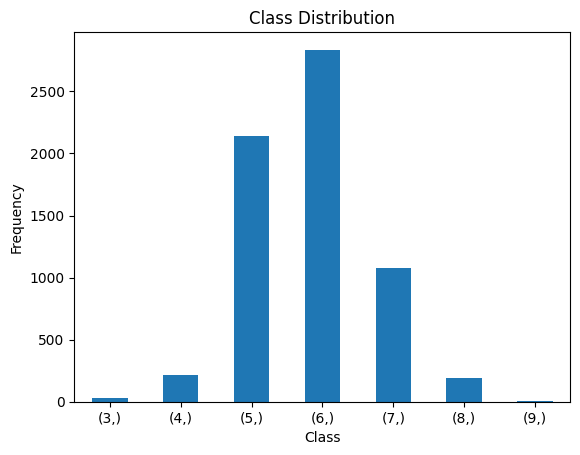

In [2]:
import matplotlib.pyplot as plt

# Step 1

# preview of data
print(X.head())

# plot class distribution
y.value_counts(sort = False).sort_index().plot(kind = 'bar')  # plots a bar chart with classes inorder
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

# Step 2

# split into training and testing sets, in this case 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# check size and distribution of sets
#print(f"Training size: {X_train.shape}")
#print(f"Test size: {X_test.shape}")

#print("Class distribution in training:\n", y_train.value_counts(normalize = True))
#print("Class distribution in test:\n", y_test.value_counts(normalize = True))

In [4]:
from sklearn.preprocessing import StandardScaler

# Step 3

# perform scaling on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Step 4

# cv on imbalanced data
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=42)
imbalanced_clf = DecisionTreeClassifier(random_state=42)
cv_scores_imbalanced = cross_val_score(imbalanced_clf, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# results
print(f"Cross Validation Accuracy (Imbalanced): {cv_scores_imbalanced.mean():.3f} (+/- {cv_scores_imbalanced.std():.3f})")


Cross Validation Accuracy (Imbalanced): 0.559 (+/- 0.010)


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 6

# evaluate on test set
imbalanced_clf.fit(X_train_scaled, y_train)
imbalanced_pred = imbalanced_clf.predict(X_test_scaled)

print("\nEvaluation on Imbalanced Dataset:")
print(classification_report(y_test, imbalanced_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, imbalanced_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, imbalanced_pred))


Evaluation on Imbalanced Dataset:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.14      0.14        43
           5       0.67      0.65      0.66       428
           6       0.65      0.63      0.64       567
           7       0.49      0.56      0.52       216
           8       0.34      0.36      0.35        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.33      0.33      0.33      1300
weighted avg       0.60      0.60      0.60      1300

Accuracy: 0.5969
Confusion Matrix:
[[  0   0   4   2   0   0   0]
 [  0   6  18  14   5   0   0]
 [  4  21 278  98  23   4   0]
 [  1  12  99 358  83  14   0]
 [  0   1  17  69 120   9   0]
 [  0   0   0  12  13  14   0]
 [  0   0   0   0   1   0   0]]


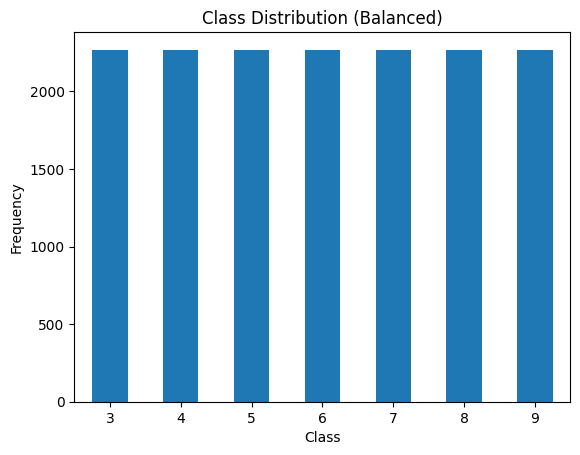

\nEvaluation on Balanced Dataset:
              precision    recall  f1-score   support

           3       0.07      0.17      0.10         6
           4       0.15      0.28      0.19        43
           5       0.64      0.58      0.61       428
           6       0.64      0.56      0.60       567
           7       0.51      0.62      0.56       216
           8       0.34      0.51      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.34      0.39      0.35      1300
weighted avg       0.59      0.56      0.57      1300

Accuracy: 0.5615
Confusion Matrix:
[[  1   3   0   2   0   0   0]
 [  2  12   9  18   2   0   0]
 [  5  39 247 103  31   3   0]
 [  6  24 107 317  87  24   2]
 [  0   3  19  49 133  12   0]
 [  0   0   1   8  10  20   0]
 [  0   0   0   1   0   0   0]]
Cross-Validation Accuracy (Balanced): 0.823 (+/- 0.005)


In [7]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 7, 8, 9

# balance the train set
y_train = np.ravel(y_train) # make sure y_train is 1-dimensional
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# plot balanced distribution
pd.Series(y_train_balanced).value_counts(sort=False).sort_index().plot(kind='bar')
plt.title("Class Distribution (Balanced)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# train decition tree on balanced data
balanced_clf = DecisionTreeClassifier(random_state=42)
balanced_clf.fit(X_train_balanced, y_train_balanced)

# evaluate test set
balanced_pred = balanced_clf.predict(X_test_scaled)
print("\\nEvaluation on Balanced Dataset:")
print(classification_report(y_test, balanced_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, balanced_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, balanced_pred))

# cv on balanced data
cv_scores_balanced = cross_val_score(balanced_clf, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy (Balanced): {cv_scores_balanced.mean():.3f} (+/- {cv_scores_balanced.std():.3f})")